# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# **PCA Class**

In [2]:
class PCA:

  def __init__(self, n_components):
    self.n_components = n_components
    self.components = None
    self.mean = None

  def fit(self, X):     # Fitting the model
    self.mean = np.mean(X, axis=0) # Finding the mean of the dataset and subtracting it from all elements
    X = X - self.mean

    cov = np.cov(X.T) # Building the covariance matrix based on the formula Cov(X,X) = (1/n)*sum((X-Xmean)(X-Xmean).T)

    eigenvalues, eigenvectors = np.linalg.eig(cov) # Finding the eigenvectors and eigenvalues of the covariance matrix
    eigenvectors = eigenvectors.T # linalg.eig returns column vectors but for easier calculations we need row vectors

    indices = np.argsort(eigenvalues)[::-1] # Sorting eigenvalues in decreasing order. The eigenvector that corresponds to the largest eigenvalue is the first principal component an so on.
    eigenvalues = eigenvalues[indices]
    eigenvectors = eigenvectors[indices]

    self.components = eigenvectors[0:self.n_components] # Storing only up to n eigenvectors


  def transform(self, X): # Transforming the original data into the new k-dimensions
    X = X - self.mean
    return np.dot(X, self.components.T)




# **Kernel PCA Class**

In [3]:
class KernelPCA:

  def __init__(self, n_components, kernel='rbf', gamma=None, degree=3, theta=1):
    self.n_components = n_components
    self.mean = None
    self.kernel = kernel
    self.gamma = gamma
    self.degree = degree
    self.theta = theta

    # Calculating the Kernel Matrix of the dataset
  def kernel_matrix(self, X1, X2):

    if self.gamma is None:      # If no gamma is set by the user
        self.gamma = 1.0 / X1.shape[1]
    if self.kernel == 'linear':
      return np.dot(X1, X2.T)
    elif self.kernel == 'rbf':
      return np.exp(-self.gamma * np.linalg.norm(X1[:, np.newaxis] - X2, axis=2)**2) # Calculating based on the rbf formula
    elif self.kernel == 'poly':
      return (np.dot(X1, X2.T) + self.theta)**self.degree
    elif self.kernel == 'sigmoid':
      return np.tanh(self.gamma * np.dot(X1, X2.T)+ self.theta)
    else:
      raise Exception("Accepted kernels: linear, poly, rbf, sigmoid")

  # Fitting the model
  def fit(self, X):

    self.X_fit = X
    n_samples = X.shape[0]

    # Finding the mean of the dataset and subtracting it from all elements / centering the data
    self.mean = np.mean(self.X_fit, axis=0)
    self.X_centered = X - self.mean

    # Building the covariance matrix based on the formula Cov(X,X) = (1/n)*sum((X-Xmean)(X-Xmean).T)
    kernel_matrix = self.kernel_matrix(self.X_centered, self.X_centered)

    # Centering the kernel matrix using the formula K - I_m.K - K.I_m + I_m.K.I_m
    id = np.zeros((n_samples, n_samples))     # Identity matrix
    np.fill_diagonal(id, 1)
    K_centered = kernel_matrix - np.dot(id, kernel_matrix) - np.dot(kernel_matrix, id) + np.dot(id, np.dot(kernel_matrix, id)) #kernel_matrix - ones.dot(kernel_matrix) - kernel_matrix.dot(ones) + ones.dot(kernel_matrix).dot(ones)

    # Finding the eigenvectors and eigenvalues of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(K_centered)
    eigenvectors = eigenvectors.T # linalg.eig returns column vectors but for easier calculations we need row vectors

    # Sorting eigenvalues in decreasing order. The eigenvector that corresponds to the largest eigenvalue is the first principal component an so on.
    indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[indices]
    eigenvectors = eigenvectors[indices]

    self.components = eigenvectors[0:self.n_components] # Storing only up to n eigenvectors

  # Projecting the original data into the new k-dimensions
  def transform(self, X):
    X = self.kernel_matrix(X - np.mean(self.X_fit, axis=0), self.X_centered)
    return np.dot(X, self.components.T)




# **PCA experiments on iris dataset**

In [4]:
data = datasets.load_iris()
X = data.data
y = data.target

In [5]:
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

In [6]:
kpca = KernelPCA(2, 'rbf') # Choose kernels ('linear', 'rbf', 'poly', 'sigmoid')
kpca.fit(X)
X_projected_kernel = kpca.transform(X)

# Visualizing the data

**PCA**

<ipython-input-7-4db4e94f9bb9>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(x1, x2, c=y, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('viridis', 3))


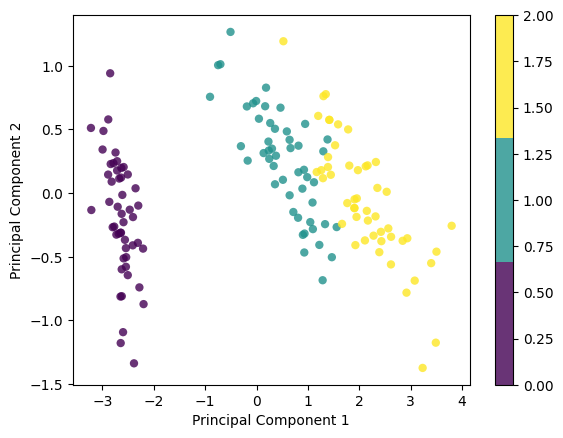

In [7]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2, c=y, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('viridis', 3))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

**Kernel PCA**

<ipython-input-8-df45da1b34c4>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(x1, x2, c=y, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('viridis', 3))


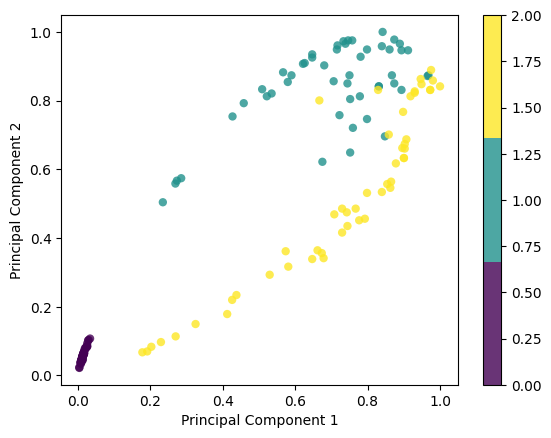

In [8]:
x1 = X_projected_kernel[:, 0]
x2 = X_projected_kernel[:, 1]

plt.scatter(x1, x2, c=y, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('viridis', 3))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()